In [606]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from __future__ import division
import math

A = pd.read_csv("F:/Spring 2018/Internship/Quantumscape/rotated.csv")
rows = A.shape[0]
columns = A.shape[1]
A = np.array(A)

In [607]:
A = A.flatten().reshape([rows, columns]).transpose()

In [608]:
print(A)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


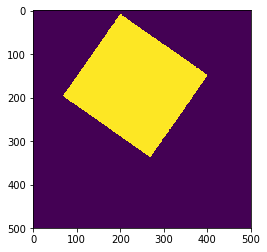

In [609]:
plt.imshow(A)

In [610]:
# Get the top-most corner for the x-axis
iTopCorner = 0
jTopCorner = 0
singleTopRow = []
for i, row in enumerate(A):
    if list(row).count(1) == 1:
        jTopCorner = i
        singleTopRow.append(row)

for j, col in enumerate(singleTopRow[0]):
    if col == 1:
        iTopCorner = j

print('Top-most corner co-ordinates')
print('(x =', iTopCorner,', y =', jTopCorner, ')')

Top-most corner co-ordinates
(x = 200 , y = 9 )


In [611]:
# Get the right-most corner from the y-axis
iRightCorner = 0
jRightCorner = 0
singleRightRow = []

for i, row in enumerate(A.transpose()):
    if list(row).count(1) == 1:
        iRightCorner = i
        singleRightRow.append(row)
        
for j, col in enumerate(singleLeftRow[0]):
    if col == 1:
        jRightCorner = j

print('Right-most corner co-ordinates')
print('(x =', iRightCorner,', y =', jRightCorner, ')')

Right-most corner co-ordinates
(x = 400 , y = 149 )


In [612]:
class Point:
    def __init__ (self, x, y):
        self.x = x
        self.y = y

In [613]:
def getSlope(pointA, pointB):
    rise = float(pointA.y) - float(pointB.y)
    run = float(pointA.x) - float(pointB.x)
    slope = rise/run

    return slope

In [614]:
#slope of outer rectangle line
p1 = Point(0, 0)
p2 = Point(iTopCorner, 0)

m2 = getSlope(p1, p2)

In [615]:
#slope of inner rectangle line
p3 = Point(iTopCorner, jTopCorner)
p4 = Point(iRightCorner, jRightCorner)

m1 = getSlope(p3, p4)

In [616]:
tanTheta = (m2 - m1)/(1 + (m1 * m2))

In [617]:
rotated_angle = math.degrees(math.atan(tanTheta))

print("%d" % round(rotated_angle, 0))
print(90 + int("%d" % round(rotated_angle, 0)))

-35
55


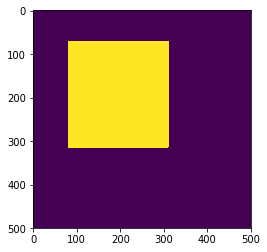

In [618]:
# Verifying
from scipy import ndimage
from scipy import misc

rotate_face_noreshape = ndimage.rotate(A.transpose(), rotated_angle, reshape = False)
plt.imshow(rotate_face_noreshape)